In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import csv
import numpy as np
import ephem
from datetime import datetime

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats

social_media_path = "OSF_socialmedia_data.csv"
social_media = pd.read_csv(social_media_path)
social_media.rename(columns = {"Unnamed: 0": "Row"}, inplace = True)
social_media.set_index("Row", inplace=True)


In [3]:
#Drop unnecessary columns
social_media = social_media.drop(['LifePak.Download.No','Session.Name', 'Session.Instance.Response.Lapse', 'Instr_DQs', 'Reminders.Delivered', 'Responded', 'Completed.Session'], axis = 1)

In [4]:
#Drop rows with NaN
social_media = social_media.dropna(axis = 0, how = 'any')

In [5]:
#Define function to assign LunarPhase (0.0 thur 1.0) to each row based on the Date column
def get_phase_on_day(dt):
  """Returns a floating-point number from 0-1. where 0=new, 0.5=full, 1=new"""
  #Ephem stores its date numbers as floating points, which the following uses
  #to conveniently extract the percent time between one new moon and the next
  #This corresponds (somewhat roughly) to the phase of the moon.

  #Use Year, Month, Day as arguments
  date=ephem.Date(datetime.date(dt))

  nnm = ephem.next_new_moon    (date)
  pnm = ephem.previous_new_moon(date)

  lunation=(date-pnm)/(nnm-pnm)

  #Note that there is a ephem.Moon().phase() command, but this returns the
  #percentage of the moon which is illuminated. This is not really what we want.

  return lunation

In [6]:
#assign 0.0 to 1.0 LunarPhase using the def get_phase_on_day
pd.to_datetime(social_media["Date"]).map(get_phase_on_day)

Row
1        0.187258
2        0.187258
3        0.187258
4        0.187258
6        0.187258
           ...   
12241    0.948577
12242    0.948577
12243    0.948577
12244    0.948577
12245    0.948577
Name: Date, Length: 8631, dtype: float64

In [7]:
#Populate the LunarPhase column with the Lunar Phase value between 0.0 and 1.0
social_media["LunarPhase"] = pd.to_datetime(social_media["Date"]).map(get_phase_on_day)

In [8]:
#Slice LunarPhase into discrete a Lunar Phase Day between 1 thru 30 (not all months have 30)
bins = [0, 0.0339, 0.0678, 0.1017, 0.1356, 0.1695, 0.2034, 0.2373, 0.2712, 0.3051, 0.3390, 0.3729, 0.4068, 0.4407, 0.4746, 0.5085, 0.5424, 0.5763, 0.6102, 0.6441, 0.6780, 0.7119, 0.7458, 0.7797, 0.8136, 0.8475, 0.8814, 0.9153, 0.9492, 0.9831, 1.0000]

LunarPhaseDayGroups = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"]

social_media["LunarPhaseDay"] = pd.cut(social_media["LunarPhase"], bins, labels=LunarPhaseDayGroups, include_lowest=True)

In [9]:
#Fillna records with 0 for Ttest function below
social_media[["Fatigue","DeprMood","Loneliness","Concentrat","LossOfInt","Inferior","Hopeless","Stress"]].fillna(0)

,Fatigue,DeprMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress
Row,,,,,,,,
1,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0
2,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0
3,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0
4,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0
6,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0
...,...,...,...,...,...,...,...,...
12241,15.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0
12242,22.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
12243,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [10]:
#pd.DataFrame
social_media_pd = pd.DataFrame(social_media)
social_media_pd.head()

,Participant,Date,Day,Time,Notification.No,Session.Instance,Fatigue,DeprMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active,LunarPhase,LunarPhaseDay
Row,,,,,,,,,,,,,,,,,,,,
1,115091,5/2/2017,Tuesday,10:00:06,1,1.0,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0,0.187258,6
2,115091,5/2/2017,Tuesday,12:02:48,2,2.0,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0,0.187258,6
3,115091,5/2/2017,Tuesday,14:03:02,3,3.0,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0,0.187258,6
4,115091,5/2/2017,Tuesday,16:34:28,4,4.0,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0,0.187258,6
6,115091,5/2/2017,Tuesday,20:02:12,6,5.0,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,10,0.0,0.0,0.187258,6


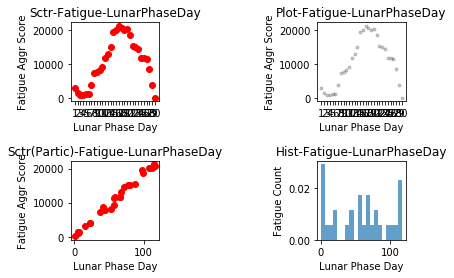

In [11]:
#Plots
lunar_phase_day = social_media_pd.groupby(["LunarPhaseDay"]).nunique()
x_values = lunar_phase_day.index
partic = lunar_phase_day["Participant"]

lunar_phase_day_sum = social_media_pd.groupby(["LunarPhaseDay"]).sum()
y_values = lunar_phase_day_sum["Fatigue"]

#---
plt.subplot(2,3,1)
plt.scatter(x_values, y_values, facecolors="red")
plt.subplots_adjust(hspace=0.75, wspace=0.4)
plt.title("Sctr-Fatigue-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Fatigue Aggr Score")
#---
plt.subplot(2,3,3)
plt.plot(x_values, y_values, 'ok', markersize=3, alpha=0.2)
plt.subplots_adjust(hspace=0.75, wspace=0.4)
plt.title("Plot-Fatigue-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Fatigue Aggr Score")
#---
plt.subplot(2,3,4)
plt.scatter(partic, y_values, facecolors="red")
plt.subplots_adjust(hspace=0.75, wspace=0.4)
plt.title("Sctr(Partic)-Fatigue-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Fatigue Aggr Score")
#---
plt.subplot(2,3,6)
plt.hist(partic, 20, density=True, alpha=0.7, label="Fatigue")
plt.subplots_adjust(hspace=0.75, wspace=0.4)
plt.title("Hist-Fatigue-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Fatigue Count")

plt.show()

In [12]:
#lunar Phase Day Groups (single day bins)
lunar_phase_day_01 = social_media_pd[social_media_pd["LunarPhaseDay"] == "1"]
lunar_phase_day_08 = social_media_pd[social_media_pd["LunarPhaseDay"] == "8"]
lunar_phase_day_15 = social_media_pd[social_media_pd["LunarPhaseDay"] == "15"]
lunar_phase_day_22 = social_media_pd[social_media_pd["LunarPhaseDay"] == "22"]

In [13]:
#01-15 pvalues

In [14]:
stats.ttest_ind(lunar_phase_day_01.Fatigue, lunar_phase_day_15.Fatigue, equal_var=False)

Ttest_indResult(statistic=2.0691752708446907, pvalue=0.0419039154634025)

In [15]:
stats.ttest_ind(lunar_phase_day_01.DeprMood, lunar_phase_day_15.DeprMood, equal_var=False)

Ttest_indResult(statistic=2.8011354117321967, pvalue=0.00644812875784222)

In [16]:
stats.ttest_ind(lunar_phase_day_01.Loneliness, lunar_phase_day_15.Loneliness, equal_var=False)

Ttest_indResult(statistic=2.9655719356512207, pvalue=0.0040880664498253805)

In [17]:
stats.ttest_ind(lunar_phase_day_01.Concentrat, lunar_phase_day_15.Concentrat, equal_var=False)

Ttest_indResult(statistic=1.110881034198267, pvalue=0.2699405439282561)

In [18]:
stats.ttest_ind(lunar_phase_day_01.LossOfInt, lunar_phase_day_15.LossOfInt, equal_var=False)

Ttest_indResult(statistic=0.9271977737329163, pvalue=0.35654855876381986)

In [19]:
stats.ttest_ind(lunar_phase_day_01.Inferior, lunar_phase_day_15.Inferior, equal_var=False)

Ttest_indResult(statistic=3.875694116184381, pvalue=0.00023267768739226128)

In [20]:
stats.ttest_ind(lunar_phase_day_01.Hopeless, lunar_phase_day_15.Hopeless, equal_var=False)

Ttest_indResult(statistic=2.692117078711184, pvalue=0.008728119108679669)

In [21]:
stats.ttest_ind(lunar_phase_day_01.Stress, lunar_phase_day_15.Stress, equal_var=False)

Ttest_indResult(statistic=3.325761743955751, pvalue=0.001371148414139251)

In [22]:
#01-08 pvalues

In [23]:
stats.ttest_ind(lunar_phase_day_01.Fatigue, lunar_phase_day_08.Fatigue, equal_var=False)

Ttest_indResult(statistic=2.2264739734639964, pvalue=0.028204820159406056)

In [24]:
stats.ttest_ind(lunar_phase_day_01.DeprMood, lunar_phase_day_08.DeprMood, equal_var=False)

Ttest_indResult(statistic=2.8605626103969706, pvalue=0.005242066645455337)

In [25]:
stats.ttest_ind(lunar_phase_day_01.Loneliness, lunar_phase_day_08.Loneliness, equal_var=False)

Ttest_indResult(statistic=3.1420520509448644, pvalue=0.002318016519856111)

In [26]:
stats.ttest_ind(lunar_phase_day_01.Concentrat, lunar_phase_day_08.Concentrat, equal_var=False)

Ttest_indResult(statistic=1.1970869334976537, pvalue=0.23390493865088624)

In [27]:
stats.ttest_ind(lunar_phase_day_01.LossOfInt, lunar_phase_day_08.LossOfInt, equal_var=False)

Ttest_indResult(statistic=0.3310443286432865, pvalue=0.741179814090484)

In [28]:
stats.ttest_ind(lunar_phase_day_01.Inferior, lunar_phase_day_08.Inferior, equal_var=False)

Ttest_indResult(statistic=3.704496915693901, pvalue=0.0003749199276600944)

In [29]:
stats.ttest_ind(lunar_phase_day_01.Hopeless, lunar_phase_day_08.Hopeless, equal_var=False)

Ttest_indResult(statistic=3.1566235609047317, pvalue=0.0022208791099769328)

In [30]:
stats.ttest_ind(lunar_phase_day_01.Stress, lunar_phase_day_08.Stress, equal_var=False)

Ttest_indResult(statistic=4.091997969234401, pvalue=9.612766526567004e-05)

In [31]:
#22-08 pvalues

In [32]:
stats.ttest_ind(lunar_phase_day_22.Fatigue, lunar_phase_day_08.Fatigue, equal_var=False)

Ttest_indResult(statistic=-0.4727842130902323, pvalue=0.636647251344933)

In [33]:
stats.ttest_ind(lunar_phase_day_22.DeprMood, lunar_phase_day_08.DeprMood, equal_var=False)

Ttest_indResult(statistic=-0.39046187088207696, pvalue=0.6964095795201303)

In [34]:
stats.ttest_ind(lunar_phase_day_22.Loneliness, lunar_phase_day_08.Loneliness, equal_var=False)

Ttest_indResult(statistic=0.48412745344467467, pvalue=0.6285518135514414)

In [35]:
stats.ttest_ind(lunar_phase_day_22.Concentrat, lunar_phase_day_08.Concentrat, equal_var=False)

Ttest_indResult(statistic=-0.204486177296582, pvalue=0.8380819569502556)

In [36]:
stats.ttest_ind(lunar_phase_day_22.LossOfInt, lunar_phase_day_08.LossOfInt, equal_var=False)

Ttest_indResult(statistic=-0.809416532810324, pvalue=0.4188336109299815)

In [37]:
stats.ttest_ind(lunar_phase_day_22.Inferior, lunar_phase_day_08.Inferior, equal_var=False)

Ttest_indResult(statistic=0.3952617903919965, pvalue=0.6928497952070256)

In [38]:
stats.ttest_ind(lunar_phase_day_22.Hopeless, lunar_phase_day_08.Hopeless, equal_var=False)

Ttest_indResult(statistic=1.183568119090956, pvalue=0.23718904455493287)

In [39]:
stats.ttest_ind(lunar_phase_day_22.Stress, lunar_phase_day_08.Stress, equal_var=False)

Ttest_indResult(statistic=-0.05129695114410686, pvalue=0.9591160600953927)

In [40]:
#The lunar phase cycle is 29.5 days
#The Moon takes 27.3 days to orbit Earth, but the lunar phase cycle (from new Moon to new Moon) is 29.5 days. The Moon spends the extra 2.2 days "catching up" because Earth travels about 45 million miles around the Sun during the time the Moon completes one orbit around Earth.
#https://www.google.com/search?q=number+of+days+in+a+moon+cycle&rlz=1C1CHBD_enUS900US900&oq=number+of+days+in+a+moon+cycle&aqs=chrome..69i57j0l4.7648j0j8&sourceid=chrome&ie=UTF-8

In [41]:
# LunarPhaseDay is a category
social_media_pd.dtypes

Participant            int64
Date                  object
Day                   object
Time                  object
Notification.No        int64
Session.Instance     float64
Fatigue              float64
DeprMood             float64
Loneliness           float64
Concentrat           float64
LossOfInt            float64
Inferior             float64
Hopeless             float64
Stress               float64
PSMU                 float64
AutoPSMU              object
News                 float64
Active               float64
LunarPhase           float64
LunarPhaseDay       category
dtype: object

In [42]:
#Export to re-import and change LunarPhaseDay to int64
social_media.to_csv("social_media_to_csv")

In [43]:
#Import to complete changing LunarPhaseDay from type category to type int64
social_media_to_csv_path = "social_media_to_csv"
social_media_pd = pd.read_csv(social_media_to_csv_path)
social_media_pd.dtypes

Row                   int64
Participant           int64
Date                 object
Day                  object
Time                 object
Notification.No       int64
Session.Instance    float64
Fatigue             float64
DeprMood            float64
Loneliness          float64
Concentrat          float64
LossOfInt           float64
Inferior            float64
Hopeless            float64
Stress              float64
PSMU                float64
AutoPSMU             object
News                float64
Active              float64
LunarPhase          float64
LunarPhaseDay         int64
dtype: object

The r-squared is: 0.18539176571801144
The slope & y-intercept equation is y = 346.27x +5276.18


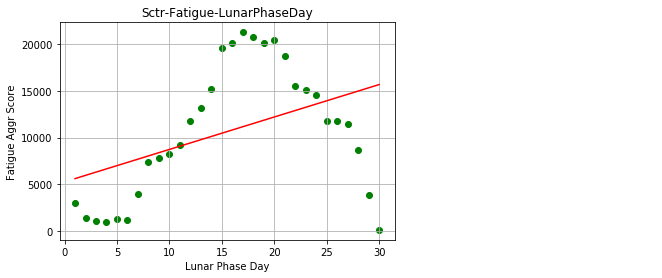

In [44]:
#Scatterplot Graph Fatigue Aggr Score by Lunar Phase Day

lunar_phase_day = social_media_pd.groupby(["LunarPhaseDay"]).nunique()
x_values = lunar_phase_day.index

lunar_phase_day_sum = social_media_pd.groupby(["LunarPhaseDay"]).sum()
y_values = lunar_phase_day_sum["Fatigue"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="green")

plt.plot(x_values,regress_values,"r-")
plt.title("Sctr-Fatigue-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Fatigue Aggr Score")
plt.annotate(line_eq,(40,100),fontsize=15,color="black")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
print(f"The slope & y-intercept equation is {line_eq}")

plt.show()

The r-squared is: 0.16874227242438122
The slope & y-intercept equation is y = 0.76x +34.43


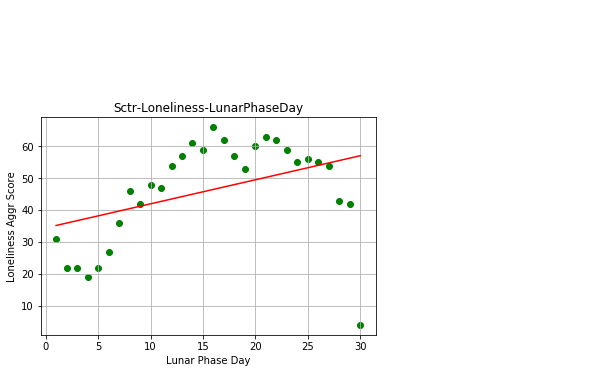

In [45]:
#Scatterplot Graph Loneliness Aggr Score by Lunar Phase Day

lunar_phase_day = social_media_pd.groupby(["LunarPhaseDay"]).nunique()
lunar_phase_day_sum = social_media_pd.groupby(["LunarPhaseDay"]).sum()

x_values = lunar_phase_day.index
y_values = lunar_phase_day["Loneliness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="green")

plt.plot(x_values,regress_values,"r-")
plt.title("Sctr-Loneliness-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Loneliness Aggr Score")
plt.annotate(line_eq,(40,100),fontsize=15,color="black")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
print(f"The slope & y-intercept equation is {line_eq}")

plt.show()

The r-squared is: 0.13947733347504815
The slope & y-intercept equation is y = 0.61x +34.17


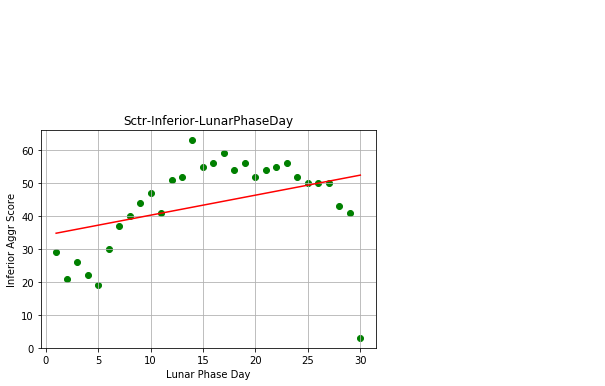

In [46]:
#Scatterplot Graph Inferior Aggr Score by Lunar Phase Day

lunar_phase_day = social_media_pd.groupby(["LunarPhaseDay"]).nunique()
lunar_phase_day_sum = social_media_pd.groupby(["LunarPhaseDay"]).sum()

x_values = lunar_phase_day.index
y_values = lunar_phase_day["Inferior"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="green")

plt.plot(x_values,regress_values,"r-")
plt.title("Sctr-Inferior-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Inferior Aggr Score")
plt.annotate(line_eq,(40,100),fontsize=15,color="black")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
print(f"The slope & y-intercept equation is {line_eq}")

plt.show()

The r-squared is: 0.17029788602367177
The slope & y-intercept equation is y = 1.01x +42.5


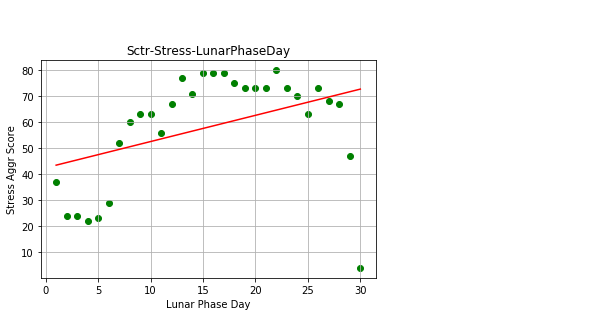

In [47]:
#Scatterplot Graph Stress Aggr Score by Lunar Phase Day

lunar_phase_day = social_media_pd.groupby(["LunarPhaseDay"]).nunique()
lunar_phase_day_sum = social_media_pd.groupby(["LunarPhaseDay"]).sum()

x_values = lunar_phase_day.index
y_values = lunar_phase_day["Stress"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.title("Sctr-Stress-LunarPhaseDay")
plt.xlabel("Lunar Phase Day")
plt.ylabel("Stress Aggr Score")
plt.annotate(line_eq,(40,100),fontsize=15,color="black")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")
print(f"The slope & y-intercept equation is {line_eq}")

plt.show()